In [2]:
import arviz as az

In [3]:
import pymc as pm

In [4]:
serie_a_df = pd.read_csv('./I1.csv')

In [5]:
serie_a_df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,I1,19/08/2023,17:30,Empoli,Verona,0,1,A,0,0,...,1.85,-0.25,2.02,1.91,2.01,1.92,2.03,1.98,1.94,1.90
1,I1,19/08/2023,17:30,Frosinone,Napoli,1,3,A,1,2,...,2.10,1.00,1.96,1.97,1.97,1.95,2.02,1.98,1.95,1.89
2,I1,19/08/2023,19:45,Genoa,Fiorentina,1,4,A,0,3,...,1.74,0.25,1.79,2.15,1.82,2.13,2.02,2.15,1.86,2.00
3,I1,19/08/2023,19:45,Inter,Monza,2,0,H,1,0,...,2.38,-1.25,1.92,2.01,1.91,2.02,1.94,2.05,1.87,1.98
4,I1,20/08/2023,17:30,Roma,Salernitana,2,2,D,1,1,...,1.68,-1.00,1.95,1.98,1.94,1.98,2.03,2.03,1.92,1.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,I1,26/05/2024,19:45,Empoli,Roma,2,1,H,1,1,...,2.03,-0.25,1.95,1.98,1.95,1.97,2.02,2.00,1.93,1.92
376,I1,26/05/2024,19:45,Frosinone,Udinese,0,1,A,0,0,...,1.78,-0.25,2.13,1.81,2.22,1.74,2.22,1.83,2.11,1.76
377,I1,26/05/2024,19:45,Lazio,Sassuolo,1,1,D,0,0,...,2.41,-1.50,1.99,1.94,1.99,1.93,2.02,2.00,1.93,1.93
378,I1,26/05/2024,19:45,Verona,Inter,2,2,D,2,2,...,2.71,1.25,2.05,1.88,2.07,1.86,2.07,1.97,1.98,1.87


In [6]:
from scipy.stats import binomtest

In [7]:
df = pd.DataFrame(serie_a_df)

# 2. Count home wins and total matches
total_matches = len(df)
home_wins = (df['FTR'] == 'H').sum()

print(f"Total matches: {total_matches}")
print(f"Home wins: {home_wins}")

# 3. Perform a binomial test
# Null hypothesis: Home win probability = 0.5
result = binomtest(home_wins, n=total_matches, p=0.5, alternative='greater')

# 4. Display the result
print("Binomial Test Result:")
print(f"p-value: {result.pvalue}")
if result.pvalue < 0.05:
    print("We reject the null hypothesis: Home teams win significantly more often than 50%.")
else:
    print("We fail to reject the null hypothesis: No significant evidence of home advantage.")

Total matches: 380
Home wins: 159
Binomial Test Result:
p-value: 0.999399394139657
We fail to reject the null hypothesis: No significant evidence of home advantage.


In [8]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import binomtest

premier_league_df = pd.read_csv('./E0.csv')

# 2. Define a function to calculate home wins and total matches
def calculate_home_win_stats(df):
    total_matches = len(df)
    home_wins = (df['FTR'] == 'H').sum()
    return home_wins, total_matches

# 3. Calculate statistics for Serie A
serie_a_home_wins, serie_a_total_matches = calculate_home_win_stats(serie_a_df)
print(f"Serie A - Home Wins: {serie_a_home_wins}, Total Matches: {serie_a_total_matches}")

# Perform binomial test for Serie A
serie_a_test = binomtest(serie_a_home_wins, n=serie_a_total_matches, p=0.5, alternative='greater')
print(f"Serie A Binomial Test p-value: {serie_a_test.pvalue}")

# 4. Calculate statistics for Premier League
pl_home_wins, pl_total_matches = calculate_home_win_stats(premier_league_df)
print(f"Premier League - Home Wins: {pl_home_wins}, Total Matches: {pl_total_matches}")

# Perform binomial test for Premier League
pl_test = binomtest(pl_home_wins, n=pl_total_matches, p=0.5, alternative='greater')
print(f"Premier League Binomial Test p-value: {pl_test.pvalue}")

# 5. Use statsmodels to perform two-proportion z-test
counts = [serie_a_home_wins, pl_home_wins]
nobs = [serie_a_total_matches, pl_total_matches]

# Use statsmodels to perform two-proportion z-test
stat, p_value = sm.stats.proportions_ztest(counts, nobs)

print("\nComparison of Home Advantage between Serie A and Premier League:")
print(f"Two-Proportion Z-Test Statistic: {stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in home advantage between Serie A and the Premier League.")
else:
    print("There is no significant difference in home advantage between Serie A and the Premier League.")


Serie A - Home Wins: 159, Total Matches: 380
Serie A Binomial Test p-value: 0.999399394139657
Premier League - Home Wins: 68, Total Matches: 159
Premier League Binomial Test p-value: 0.9716720015831143

Comparison of Home Advantage between Serie A and Premier League:
Two-Proportion Z-Test Statistic: -0.1984
p-value: 0.8427
There is no significant difference in home advantage between Serie A and the Premier League.


In [9]:
# Define a function to calculate home wins and total matches
def calculate_home_win_stats(df):
    total_matches = len(df)
    home_wins = (df['FTR'] == 'H').sum()  # Home win: 'H'
    return home_wins, total_matches

# Calculate home win statistics for both leagues
serie_a_home_wins, serie_a_total_matches = calculate_home_win_stats(serie_a_df)
pl_home_wins, pl_total_matches = calculate_home_win_stats(premier_league_df)

print(f"Serie A - Home Wins: {serie_a_home_wins}, Total Matches: {serie_a_total_matches}")
print(f"Premier League - Home Wins: {pl_home_wins}, Total Matches: {pl_total_matches}")


Serie A - Home Wins: 159, Total Matches: 380
Premier League - Home Wins: 68, Total Matches: 159


Observed proportion of home wins in Serie A: 0.418
Observed proportion of home wins in Premier League: 0.428


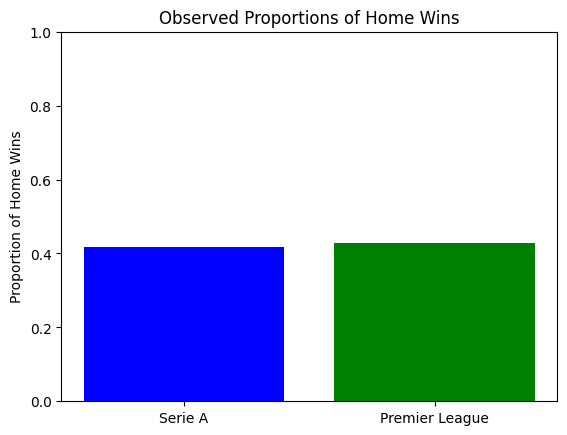

In [24]:
# Calculate proportions
p_serie_a_obs = serie_a_home_wins / serie_a_total_matches
p_pl_obs = pl_home_wins / pl_total_matches

print(f"Observed proportion of home wins in Serie A: {p_serie_a_obs:.3f}")
print(f"Observed proportion of home wins in Premier League: {p_pl_obs:.3f}")

# Plot the observed proportions
leagues = ["Serie A", "Premier League"]
observed_proportions = [p_serie_a_obs, p_pl_obs]

plt.bar(leagues, observed_proportions, color=['blue', 'green'])
plt.ylabel('Proportion of Home Wins')
plt.title('Observed Proportions of Home Wins')
plt.ylim(0, 1)
plt.show()

### We chose Beta(1, 1) as a prior because it is a non-informative, uniform prior, indicating no strong belief about the home win proportions before observing the data. This allows the data to predominantly influence the posterior distribution, making it a common choice when there is little prior knowledge about the parameter.

## Informing the Beta Distribution Prior Based on Data

For a **Beta distribution**, the parameters $( \alpha )$ and $( \beta )$ can be chosen based on observed data:

- **Mean of the Beta distribution**:  
  $\mu = \frac{\alpha}{\alpha + \beta}$

- **Variance of the Beta distribution**:  
  $\text{Var} = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$

### Choosing the Prior Parameters

If we use the observed data to inform the prior:
1. **Set the mean** of the Beta distribution to the observed proportion $p_{\text{obs}} $
2. **Tune the concentration (precision)** parameter based on the sample size or our confidence.

The updated parameters can be defined as:
$\alpha' = p_{\text{obs}} \cdot k, \quad \beta' = (1 - p_{\text{obs}}) \cdot k$
where:
- $ p_{\text{obs}} $ is the observed proportion of successes.
- $ k $ is a scaling factor that controls the "weight" or strength of the prior. For example, a smaller $ k $ (e.g., $ k = 20 $) results in a more diffuse prior, while a larger $ k $ increases the confidence in the prior.

### Example

Suppose the observed proportion of home wins is $ p_{\text{obs}} = 0.55 $, and we set $ k = 20 $:  
- $ \alpha' = 0.55 \cdot 20 = 11 $
- $\beta' = (1 - 0.55) \cdot 20 = 9 $

The resulting Beta distribution would have parameters $ \alpha' = 11 $ and $ \beta' = 9 $, with a mean of $ 0.55$.

This approach allows the prior to reflect the observed data while controlling its strength through $ k $.


Output()

Output()

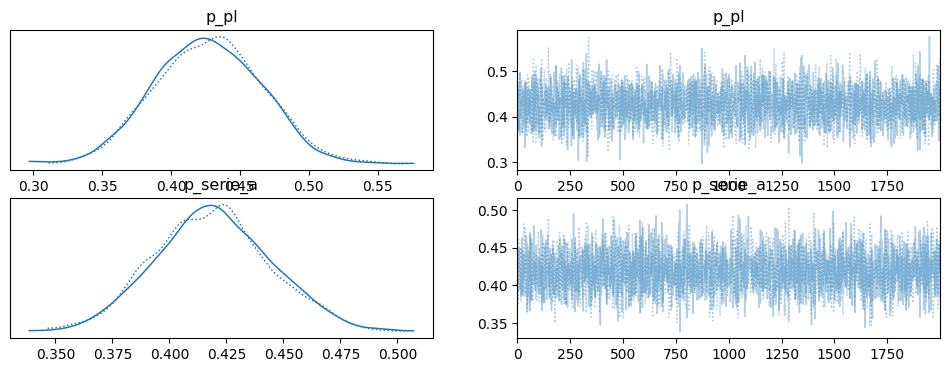

In [12]:
with pm.Model() as model:
    # Priors for the proportions of home wins in both leagues
    p_serie_a = pm.Beta('p_serie_a', alpha=1, beta=1)  # Beta distribution as a prior
    p_pl = pm.Beta('p_pl', alpha=1, beta=1)

    # Likelihood: Binomial likelihood for the number of home wins in each league
    home_wins_serie_a = pm.Binomial('home_wins_serie_a', n=serie_a_total_matches, p=p_serie_a, observed=serie_a_home_wins)
    home_wins_pl = pm.Binomial('home_wins_pl', n=pl_total_matches, p=p_pl, observed=pl_home_wins)

    # Sampling from the posterior
    trace = pm.sample(2000, return_inferencedata=True)

# ArviZ traceplot
az.plot_trace(trace)
plt.show()

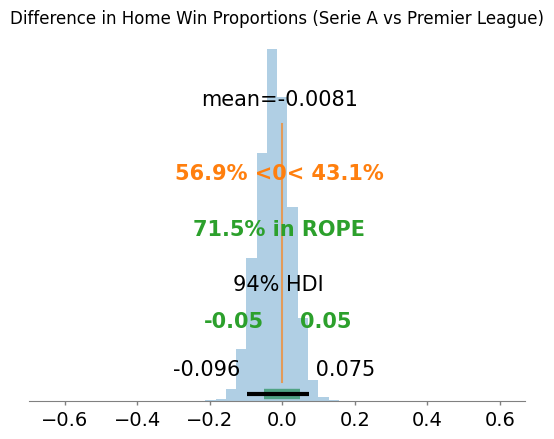

In [22]:
p_serie_a_samples = trace.posterior['p_serie_a'].values.flatten()
p_pl_samples = trace.posterior['p_pl'].values.flatten()
rope = (-0.05, 0.05)

difference_samples = p_serie_a_samples - p_pl_samples

az.plot_posterior(
    difference_samples,
    ref_val=0,  # Reference value for the null hypothesis (no difference)
    rope=rope,  # Region of Practical Equivalence
    kind='hist'
)
plt.title('Difference in Home Win Proportions (Serie A vs Premier League)')
plt.show()

### Let's now with a stronger prior

In [25]:
prior_strength = 20

# Calculate alpha and beta for informed priors
alpha_serie_a = p_serie_a_obs * prior_strength
beta_serie_a = (1 - p_serie_a_obs) * prior_strength

alpha_pl = p_pl_obs * prior_strength
beta_pl = (1 - p_pl_obs) * prior_strength

print(f"Serie A Prior (alpha={alpha_serie_a:.2f}, beta={beta_serie_a:.2f})")
print(f"Premier League Prior (alpha={alpha_pl:.2f}, beta={beta_pl:.2f})")


Serie A Prior (alpha=8.37, beta=11.63)
Premier League Prior (alpha=8.55, beta=11.45)


### We created a slightly higher prior for the premier league

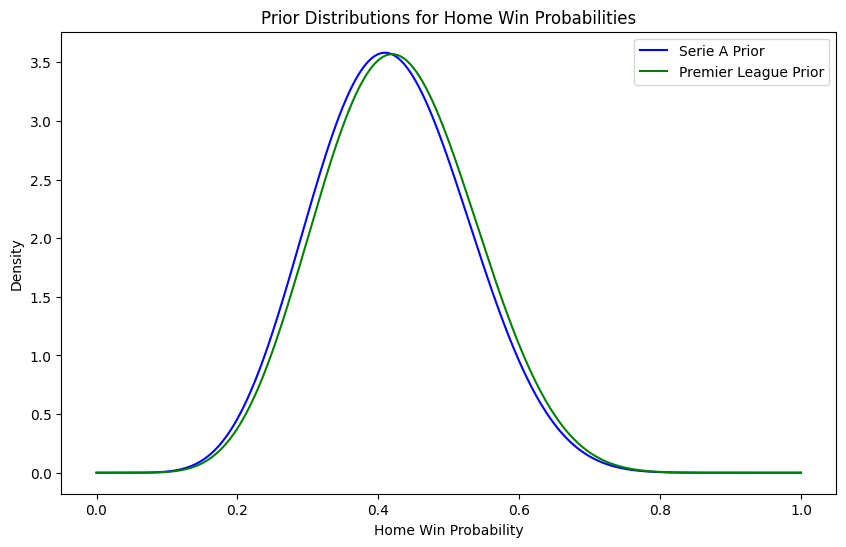

In [28]:
from scipy.stats import beta

# Create the plot for the prior distributions
x = np.linspace(0, 1, 1000)

prior_strength = 20  # Replace with your actual value
alpha_serie_a = p_serie_a_obs * prior_strength
beta_serie_a = (1 - p_serie_a_obs) * prior_strength
alpha_pl = p_pl_obs * prior_strength
beta_pl = (1 - p_pl_obs) * prior_strength

plt.figure(figsize=(10, 6))
plt.plot(x, beta.pdf(x, alpha_serie_a, beta_serie_a), label="Serie A Prior", color="blue")
plt.plot(x, beta.pdf(x, alpha_pl, beta_pl), label="Premier League Prior", color="green")
plt.xlabel("Home Win Probability")
plt.ylabel("Density")
plt.title("Prior Distributions for Home Win Probabilities")
plt.legend()
plt.show()

Output()

Output()

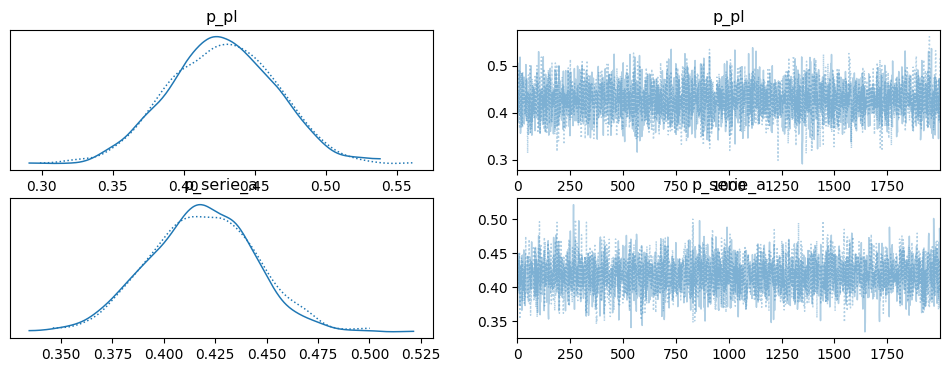

In [26]:
with pm.Model() as informed_model:
    # Priors for proportions using informed Beta distribution
    p_serie_a = pm.Beta('p_serie_a', alpha=alpha_serie_a, beta=beta_serie_a)
    p_pl = pm.Beta('p_pl', alpha=alpha_pl, beta=beta_pl)

    # Likelihoods based on observed data
    home_wins_serie_a = pm.Binomial('home_wins_serie_a', n=serie_a_total_matches, p=p_serie_a, observed=serie_a_home_wins)
    home_wins_pl = pm.Binomial('home_wins_pl', n=pl_total_matches, p=p_pl, observed=pl_home_wins)

    # Sampling from the posterior
    informed_trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

# Visualize the results
pm.plot_trace(informed_trace)
plt.show()

Proportion of samples within the ROPE: 0.713


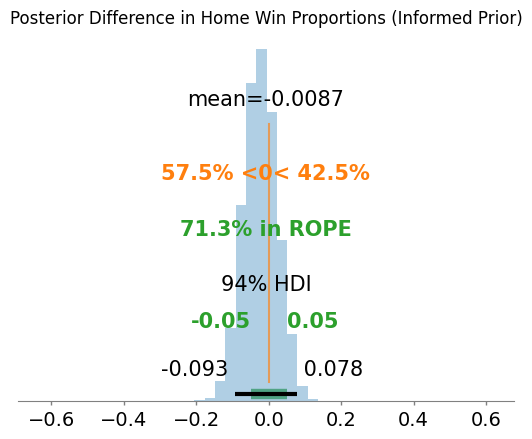

In [27]:
# Extract samples of posterior proportions
p_serie_a_samples = informed_trace.posterior['p_serie_a'].values.flatten()
p_pl_samples = informed_trace.posterior['p_pl'].values.flatten()

# Compute the difference
difference_samples = p_serie_a_samples - p_pl_samples

# Proportion of samples within the ROPE
rope = (-0.05, 0.05)
in_rope = np.sum((difference_samples >= rope[0]) & (difference_samples <= rope[1])) / len(difference_samples)

print(f"Proportion of samples within the ROPE: {in_rope:.3f}")

# Plot the posterior difference
az.plot_posterior(
    difference_samples,
    ref_val=0,
    rope=rope,
    kind='hist'
)
plt.title('Posterior Difference in Home Win Proportions (Informed Prior)')
plt.show()


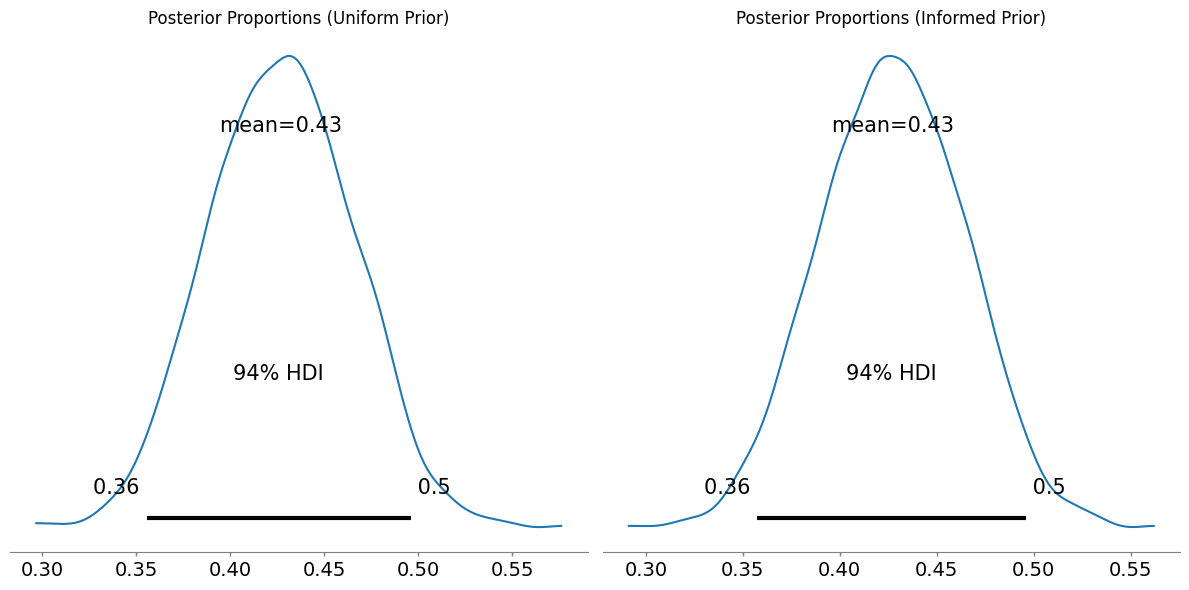

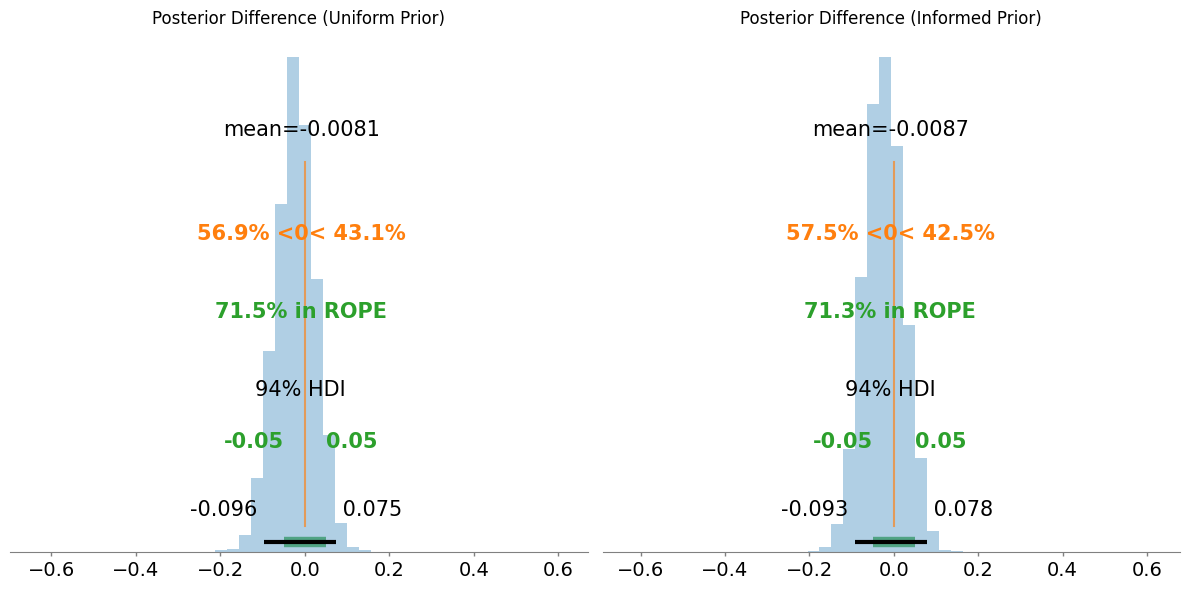

Proportion of samples within ROPE (Uniform Prior): 0.716
Proportion of samples within ROPE (Informed Prior): 0.713


In [29]:
import arviz as az
import matplotlib.pyplot as plt

# Uniform prior samples
p_serie_a_uniform = trace.posterior['p_serie_a'].values.flatten()
p_pl_uniform = trace.posterior['p_pl'].values.flatten()
diff_uniform = p_serie_a_uniform - p_pl_uniform

# Informed prior samples
p_serie_a_informed = informed_trace.posterior['p_serie_a'].values.flatten()
p_pl_informed = informed_trace.posterior['p_pl'].values.flatten()
diff_informed = p_serie_a_informed - p_pl_informed

# Plot the posterior distributions for p_serie_a and p_pl
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Posterior distributions under uniform prior
az.plot_posterior(
    {'Serie A': p_serie_a_uniform, 'Premier League': p_pl_uniform},
    ax=axes[0],
    hdi_prob=0.94
)
axes[0].set_title('Posterior Proportions (Uniform Prior)')

# Posterior distributions under informed prior
az.plot_posterior(
    {'Serie A': p_serie_a_informed, 'Premier League': p_pl_informed},
    ax=axes[1],
    hdi_prob=0.94
)
axes[1].set_title('Posterior Proportions (Informed Prior)')

plt.tight_layout()
plt.show()

# Compare the posterior difference with ROPE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Difference under uniform prior
az.plot_posterior(
    diff_uniform, ref_val=0, rope=(-0.05, 0.05), ax=axes[0], kind="hist"
)
axes[0].set_title('Posterior Difference (Uniform Prior)')

# Difference under informed prior
az.plot_posterior(
    diff_informed, ref_val=0, rope=(-0.05, 0.05), ax=axes[1], kind="hist"
)
axes[1].set_title('Posterior Difference (Informed Prior)')

plt.tight_layout()
plt.show()

# Summarize the proportion of samples within ROPE
rope = (-0.05, 0.05)
in_rope_uniform = np.sum((diff_uniform >= rope[0]) & (diff_uniform <= rope[1])) / len(diff_uniform)
in_rope_informed = np.sum((diff_informed >= rope[0]) & (diff_informed <= rope[1])) / len(diff_informed)

print(f"Proportion of samples within ROPE (Uniform Prior): {in_rope_uniform:.3f}")
print(f"Proportion of samples within ROPE (Informed Prior): {in_rope_informed:.3f}")
